# Abstract:
- Banks receive a lot of applications for issuance of credit cards. Many of them are rejected for many reasons, like high-loan balances, low-income levels, or too many inquiries on an individual’s credit report. Manually analyzing these applications is error-prone and a time consuming process. This task can be automated with the power of machine learning. In this project, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do. 
 
# Problem Statement: 
- The task is to analyze and build a predictive model that can accurately determine whether a credit card application should be approved or rejected based on various applicant attributes and historical credit data. The goal is to develop a model that can assist financial institutions in making informed decisions while minimizing the risk of default and maximizing profitability. 
 
- They have given a problem to identify the customers segments which are eligible for Credit Card approval, so that they can specifically target these customers. 

# Variable Description: 

## File - Application Record.csv 
 
Column 	                                 Description 
- ID 	Unique Id of the row  
- CODE_GENDER 	Gender of the applicant. M is male and F is female.  
- FLAG_OWN_CAR	  Is an applicant with a car? Y is Yes and N is NO.
- FLAG_OWN_REALTY 	Is an applicant with realty? Y is Yes and N is No. 
- CNT_CHILDREN 	Count of children. 
- AMT_INCOME_TOTAL 	the amount of the income. 
- NAME_INCOME_TYPE 	The type of income (5 types in total). 
- NAME_EDUCATION_TYPE 	The type of education (5 types in total). 
- NAME_FAMILY_STATUS 	The type of family status (6 types in total). 
 
- DAYS_BIRTH 	The number of the days from birth (Negative values). 
- DAYS_EMPLOYED 	The number of the days from employment (Negative values). This column has error values. 
-  FLAG_MOBIL 	Is an applicant with a mobile? 1 is True and 0 is False 
- FLAG_WORK_PHONE 	Is an applicant with a work phone? 1 is True and 0 is False. 
- FLAG_PHONE 	 Is an applicant with a phone? 1 is True and 0 is False. 
 
- FLAG_EMAIL 	Is an applicant with an email? 1 is True and 0 is False.   
 
- OCCUPATION_TYPE 	The type of occupation (19 types in total). This column has missing values. 
- CNT_FAM_MEMBERS 	 The count of family members. 
 
## File - Credit Record.csv 
 
- ID 	Unique Id of the row in application record. 
 
- MONTHS_BALANCE 	The number of months from record time. 
- STATUS 	Credit status for this month. 
- X: No loan for the month 
- C: paid off that month 
- 0: 1-29 days past due 
- 1: 30-59 days past due 
- 2: 60-89 days overdue 
- 3: 90-119 days overdue 
- 4: 120-149 days overdue 
- 5: Overdue or bad debts, write-offs for more than 150 days 
 
### Note – 
- DAYS_BIRTH ---> Count backwards from current day (0), -1 means yesterday. 
- DAYS_EMPLOYED ---> Count backwards from current day (0). If positive, it means the person currently unemployed. 
- MONTHS_BALANCE ---> The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on. 
- STATUS ---> 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, writeoffs for more than 150 days C: paid off that month X: No loan for the month 
 
 
## Scope: 
- Understand data by performing exploratory data analysis 
- Training and building classification algorithm to predict if a customer will be approved with credit card or not 
- Understand feature importance and improve the model 
- Understand various model performance metrics and measure the performance of each model 
 
## Objective & Learning Outcome: 
The objective is to train a machine learning model using the provided dataset to predict the approval outcome for new credit card applications accurately. The model should generalize well to unseen data and provide a reliable assessment of the creditworthiness of applicants. 
Students should be able to predict credit card approval from records with the help of a classification model. They should also be able to perform EDA and re-build the model and check if there is any significant change in the predictive scores.


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use("classic")
import os,sys
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as pyo
from plotly import tools
from plotly.subplots import make_subplots

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data= pd.read_csv("application_record.csv")
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
print("No of datapoints for application record :{}".format(len(data)))
print("No of unique clients in dataset {}".format(len(data["ID"].unique())))

No of datapoints for application record :438557
No of unique clients in dataset 438510


In [4]:
# Only few customers repeated mulitple times rest are all unique customers

# Credit Record

In [5]:
records= pd.read_csv("credit_record.csv")
records.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
print("No of datapoints for credit record :{}".format(len(records)))
print("No of unique clients in dataset {}".format(len(records["ID"].unique())))

No of datapoints for credit record :1048575
No of unique clients in dataset 45985


In [7]:
# Mulitple transaction done by same clients

In [8]:
len(set(records["ID"]))

45985

In [9]:
# To find out common number of ID from both the datas-
# To find out how many customers have credit card and again requsted for the same.

In [10]:
len(set(records["ID"]).intersection(set(data["ID"])))

36457

# Duplicates

### To find duplicate records of the data in both the dataset. 
### Application record contain 79.5% of duplicate records
### Credit record has no duplicate values

In [11]:
print(f"Duplicates in application data :{data.iloc[:,1:].duplicated().sum()},({np.round(100*data.iloc[:,1:].duplicated().sum()/len(data),1)}%)")

Duplicates in application data :348472,(79.5%)


In [12]:
print(f"Duplicates in record data :{records.duplicated().sum()},({np.round(100*records.duplicated().sum()/len(records),1)}%)")

Duplicates in record data :0,(0.0%)


# Drop Duplicates

In [13]:
data= data.drop_duplicates(subset= data.columns[1:],keep="first")

In [14]:
data.shape

(90085, 18)

# Finding out common customers after dropping duplicates

In [15]:
len(set(records["ID"]).intersection(set(data["ID"])))

9709

In [16]:
unique_counts=pd.DataFrame.from_records([(col,data[col].nunique()) for col in data.columns],columns=["Column name","Num unique"]).sort_values(by=["Num unique"])

In [17]:
unique_counts

,Column name,Num unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [18]:
unique_counts=pd.DataFrame.from_records([(col,records[col].nunique()) for col in records.columns],columns=["Column name","Num unique"]).sort_values(by=["Num unique"])

In [19]:
unique_counts

,Column name,Num unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


In [20]:
data.drop(["FLAG_MOBIL"],axis=1, inplace= True)

In [21]:
data.shape

(90085, 17)

# Handling Missing Values

In [22]:
data.isnull().sum()/len(data)*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.501193
CNT_FAM_MEMBERS         0.000000
dtype: float64

In [23]:
import missingno as msno

Text(0.5, 1.0, 'Missing Data for application record data')

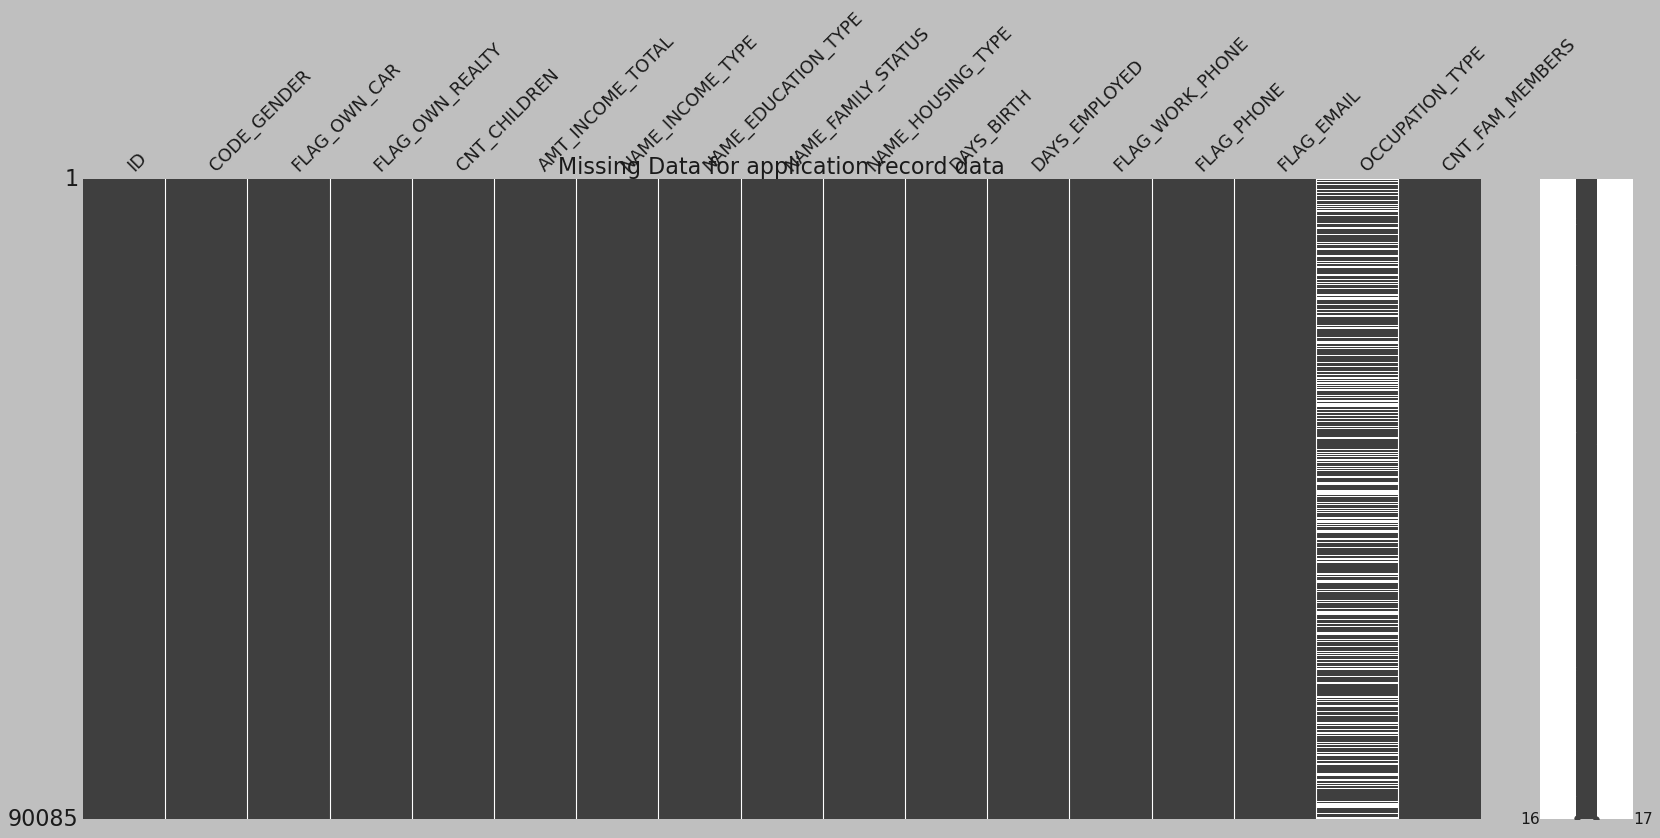

In [24]:
import missingno as msno

missing = msno.matrix(data)
missing.set_title("Missing Data for application record data", fontsize=20)

In [25]:
# Occupation type has missing data but as credit approval data this is very important variable so cannot drop it.

# We will update it with others 

In [26]:
data["OCCUPATION_TYPE"].fillna(value="Other",inplace= True)

Text(0.5, 1.0, 'Missing Data for application record data')

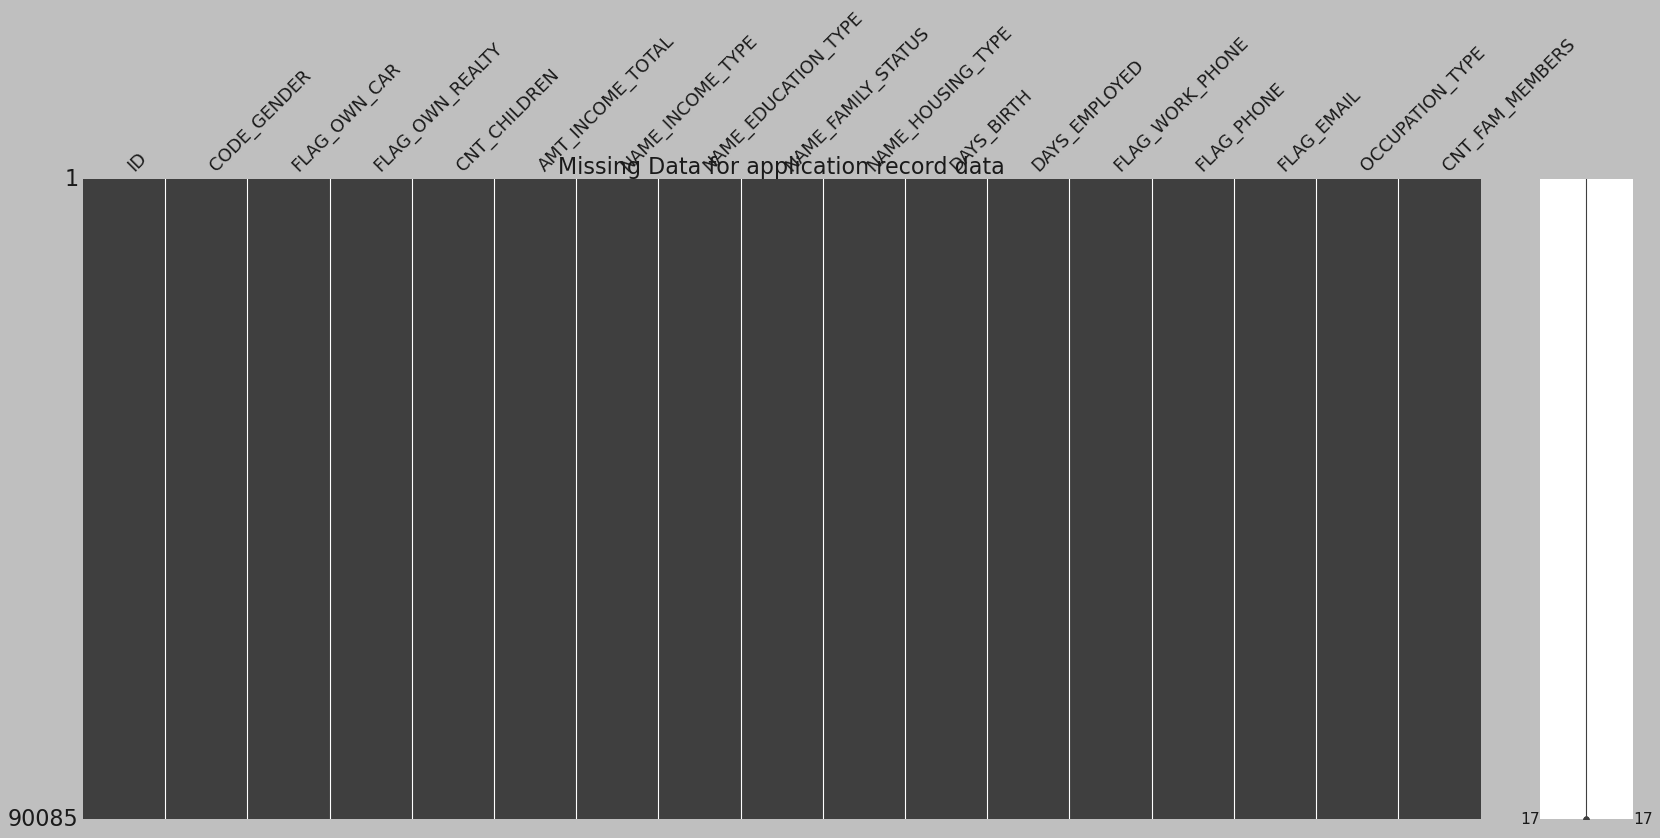

In [27]:
import missingno as msno

missing = msno.matrix(data)
missing.set_title("Missing Data for application record data", fontsize=20)

In [28]:
records.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

# Converting data in a proper format

In [29]:
records["STATUS"].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [30]:
records["target"]= records["STATUS"]
records["target"].replace("X",0,inplace= True)
records["target"].replace("C",0, inplace= True)
records["target"]=records["target"].astype(int)
records.loc[records["target"]>=1,'target']=1

In [31]:
records["target"].value_counts(normalize = True)*100

0    98.646353
1     1.353647
Name: target, dtype: float64

# Total unique Customers

In [32]:
df= pd.DataFrame(records.groupby(["ID"])["target"].agg(max)).reset_index()

In [33]:
df["target"].value_counts()

0    40635
1     5350
Name: target, dtype: int64

In [34]:
# 5350 are customers that can fraud/defaulters

# Combining both tables:
- To merge two dataframes with an inner join in python, you can use the pandas module and the merge() method. The merge() method takes two dataframes as arguments and returns a new dataframe that contains only the rows that have matching values in the common column
- The result will be a dataframe that contains only the rows that have the same id value in both df1 and df2

In [35]:
new_df= pd.merge(data, df, how= "inner",on="ID")

In [36]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9709 entries, 0 to 9708
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9709 non-null   int64  
 1   CODE_GENDER          9709 non-null   object 
 2   FLAG_OWN_CAR         9709 non-null   object 
 3   FLAG_OWN_REALTY      9709 non-null   object 
 4   CNT_CHILDREN         9709 non-null   int64  
 5   AMT_INCOME_TOTAL     9709 non-null   float64
 6   NAME_INCOME_TYPE     9709 non-null   object 
 7   NAME_EDUCATION_TYPE  9709 non-null   object 
 8   NAME_FAMILY_STATUS   9709 non-null   object 
 9   NAME_HOUSING_TYPE    9709 non-null   object 
 10  DAYS_BIRTH           9709 non-null   int64  
 11  DAYS_EMPLOYED        9709 non-null   int64  
 12  FLAG_WORK_PHONE      9709 non-null   int64  
 13  FLAG_PHONE           9709 non-null   int64  
 14  FLAG_EMAIL           9709 non-null   int64  
 15  OCCUPATION_TYPE      9709 non-null   o

In [38]:
new_df["target"].value_counts()

0    8426
1    1283
Name: target, dtype: int64

# Converting age to years 

In [39]:
new_df["DAYS_BIRTH"]

0      -12005
1      -21474
2      -19110
3      -22464
4      -16872
        ...  
9704   -20600
9705   -15837
9706   -19101
9707   -12387
9708    -9188
Name: DAYS_BIRTH, Length: 9709, dtype: int64

In [40]:
new_df["Age_Years"]= round(-new_df["DAYS_BIRTH"]/365,0)

In [41]:
new_df["Age_Years"]

0       33.0
1       59.0
2       52.0
3       62.0
4       46.0
        ... 
9704    56.0
9705    43.0
9706    52.0
9707    34.0
9708    25.0
Name: Age_Years, Length: 9709, dtype: float64

In [42]:
new_df.drop(["DAYS_BIRTH"], axis=1, inplace= True)

In [43]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,33.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,59.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,52.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,62.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,56.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,43.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,52.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,34.0


# Converting Days Employed to two columns. 
- Unemployed
- Years_employed


- DAYS_EMPLOYED 	The number of the days from employment (Negative values). This column has error values. 
- DAYS_EMPLOYED ---> Count backwards from current day (0). If positive, it means the person currently unemployed. 

In [44]:
new_df["Unemployed"] = 0
new_df.loc[-new_df["DAYS_EMPLOYED"]<0,"Unemployed"]=1

In [45]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years,Unemployed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,33.0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,59.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,52.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,62.0,1
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,46.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,56.0,0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,43.0,0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,52.0,0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,34.0,0


In [46]:
new_df["Year_Employed"] = round(-new_df["DAYS_EMPLOYED"]/365,0)
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years,Unemployed,Year_Employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,62.0,1,-1001.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,46.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,56.0,0,1.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,43.0,0,7.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,52.0,0,5.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,34.0,0,4.0


In [47]:
new_df.loc[new_df["Year_Employed"]<0,"Year_Employed"]=0
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years,Unemployed,Year_Employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,46.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,56.0,0,1.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,43.0,0,7.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,52.0,0,5.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,34.0,0,4.0


In [48]:
new_df.drop("DAYS_EMPLOYED",axis = 1,inplace= True)

In [49]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years,Unemployed,Year_Employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,46.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0,0,0,Laborers,2.0,1,56.0,0,1.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,Other,2.0,1,43.0,0,7.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Other,2.0,1,52.0,0,5.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,34.0,0,4.0


# Renaming the column names with more meaningful names

In [50]:
new_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'target', 'Age_Years', 'Unemployed', 'Year_Employed'],
      dtype='object')

In [51]:
new_df=new_df.rename(columns={'CODE_GENDER':"Gender", 'FLAG_OWN_CAR':"Own_Car", 'FLAG_OWN_REALTY':"Own_Property", 'CNT_CHILDREN':"Num_Children",
       'AMT_INCOME_TOTAL':"Total_Income", 'NAME_INCOME_TYPE':"Income_Type", 'NAME_EDUCATION_TYPE':"Education_Type",
       'NAME_FAMILY_STATUS':"Family_Status", 'NAME_HOUSING_TYPE':"House_Type", 'FLAG_WORK_PHONE':"Work_Phone",
       'FLAG_PHONE':"Phone", 'FLAG_EMAIL':"Email", 'OCCUPATION_TYPE':"Occupation", 'CNT_FAM_MEMBERS':"Num_Family_Members",
       'target':"Target", 'Age_Years':"Age", 'Unemployed':"Unemployed", 'Year_Employed':"Years_Experience"})

In [52]:
new_df.head()

,ID,Gender,Own_Car,Own_Property,Num_Children,Total_Income,Income_Type,Education_Type,Family_Status,House_Type,Work_Phone,Phone,Email,Occupation,Num_Family_Members,Target,Age,Unemployed,Years_Experience
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,46.0,0,2.0


# Visualisation

<Figure size 1200x1200 with 0 Axes>

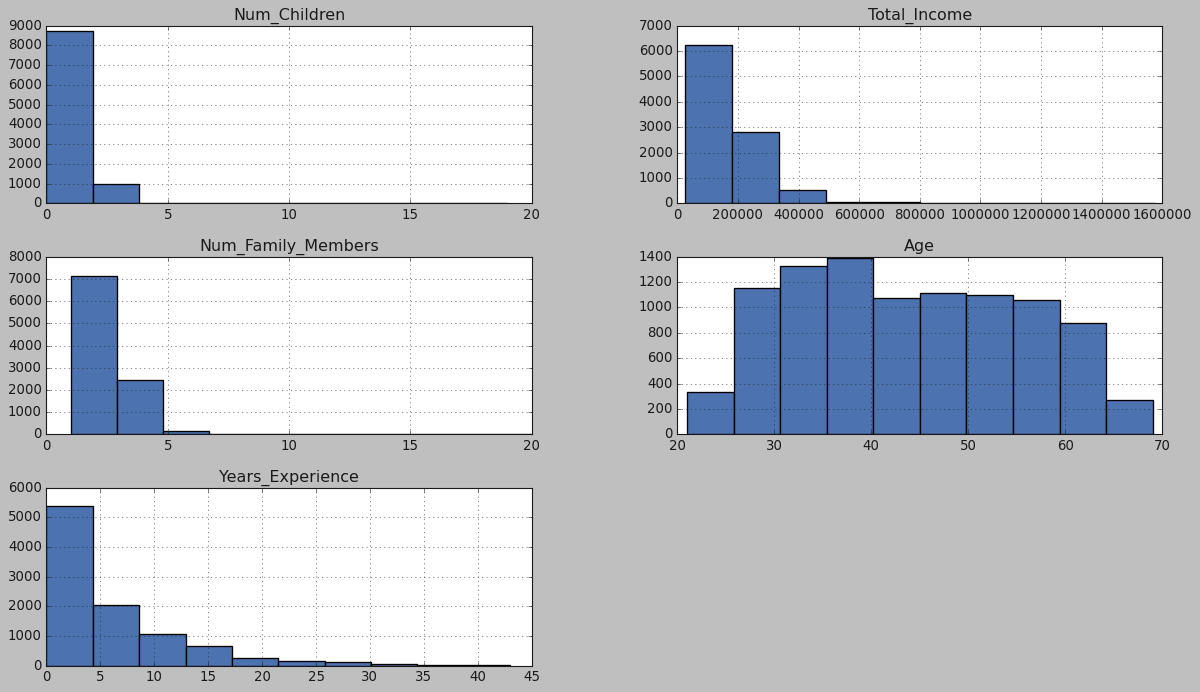

In [53]:
plt.figure(figsize=(15,15))
cols_to_plot=["Num_Children","Total_Income","Num_Family_Members","Age","Years_Experience"]
new_df[cols_to_plot].hist(edgecolor = "black",linewidth = 1.2)
plt.xticks(rotation=90)
fig= plt.gcf()
fig.set_size_inches(18,10)

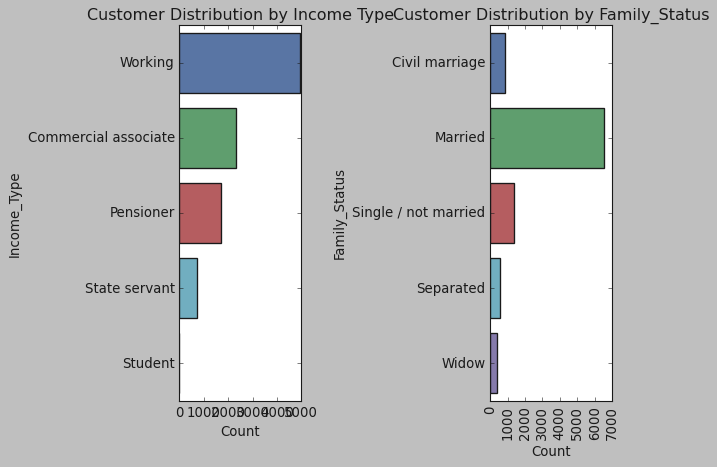

In [54]:
ig,axes = plt.subplots(1,2)

g1 = sns.countplot(y=new_df.Income_Type,linewidth=1.2,ax=axes[0])
plt.xticks(rotation=90)
g1.set_title("Customer Distribution by Income Type")
g1.set_xlabel("Count")

g2 = sns.countplot(y=new_df.Family_Status,linewidth=1.2,ax=axes[1])
plt.xticks(rotation=90)
g2.set_title("Customer Distribution by Family_Status")
g2.set_xlabel("Count")

fig.set_size_inches(15,15)
plt.tight_layout()
plt.show()

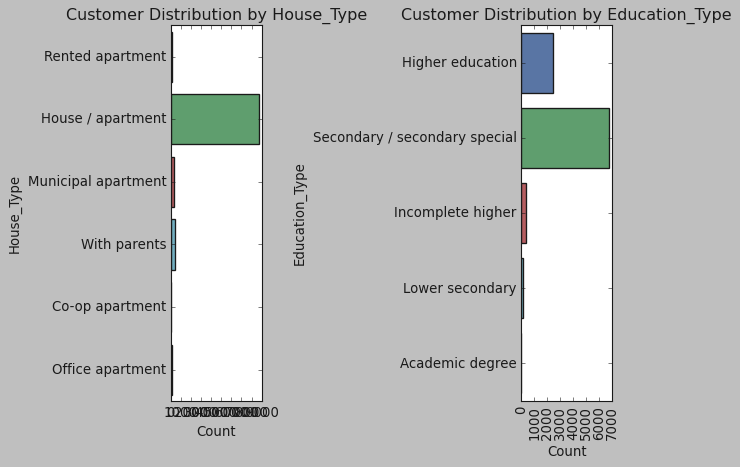

In [55]:
ig,axes = plt.subplots(1,2)

g1 = sns.countplot(y=new_df.House_Type,linewidth=1.2,ax=axes[0])
plt.xticks(rotation=90)
g1.set_title("Customer Distribution by House_Type")
g1.set_xlabel("Count")

g2 = sns.countplot(y=new_df.Education_Type,linewidth=1.2,ax=axes[1])
plt.xticks(rotation=90)
g2.set_title("Customer Distribution by Education_Type")
g2.set_xlabel("Count")

fig.set_size_inches(20,25)
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Gender'>

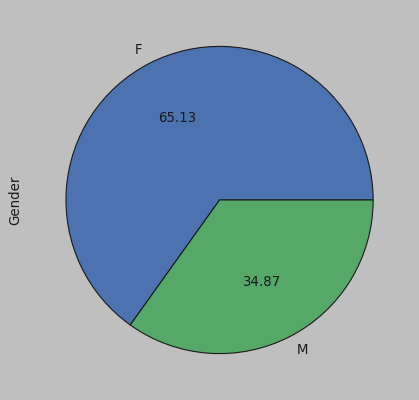

In [56]:
new_df["Gender"].value_counts().plot(kind="pie",autopct = "%.2f")

In [57]:
new_df.columns

Index(['ID', 'Gender', 'Own_Car', 'Own_Property', 'Num_Children',
       'Total_Income', 'Income_Type', 'Education_Type', 'Family_Status',
       'House_Type', 'Work_Phone', 'Phone', 'Email', 'Occupation',
       'Num_Family_Members', 'Target', 'Age', 'Unemployed',
       'Years_Experience'],
      dtype='object')

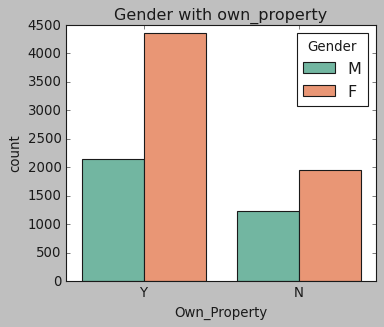

In [58]:
plt.figure(figsize=(5,4))
sns.countplot(x='Own_Property', hue ='Gender', data=new_df, palette='Set2')
plt.title("Gender with own_property")
plt.show()

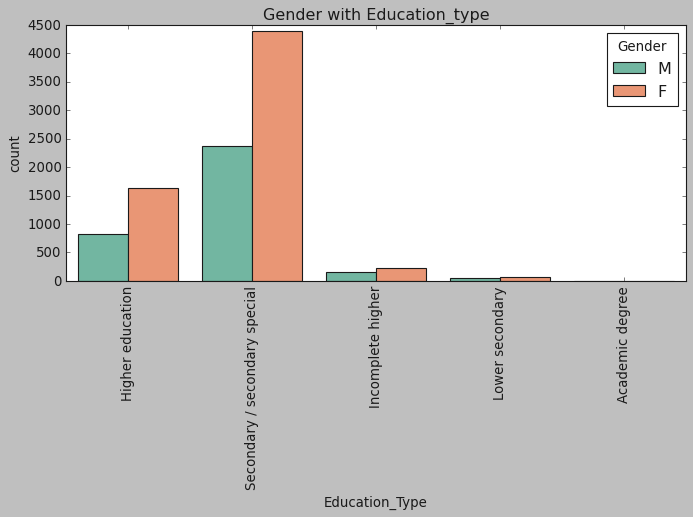

In [59]:
plt.figure(figsize=(10,4))
sns.countplot(x='Education_Type', hue ='Gender', data=new_df, palette='Set2')
plt.xticks(rotation=90)
plt.title("Gender with Education_type")
plt.show()

In [60]:
object_columns = new_df.columns[new_df.dtypes=="object"].tolist()

In [61]:
object_columns

['Gender',
 'Own_Car',
 'Own_Property',
 'Income_Type',
 'Education_Type',
 'Family_Status',
 'House_Type',
 'Occupation']

In [62]:
unique_counts = pd.DataFrame.from_records([(col,new_df[object_columns][col].nunique()) for col in new_df[object_columns].columns],
                                          columns=["Column_name","No_Unique"]).sort_values(by="No_Unique")

In [63]:
unique_counts

,Column_name,No_Unique
0,Gender,2
1,Own_Car,2
2,Own_Property,2
3,Income_Type,5
4,Education_Type,5
5,Family_Status,5
6,House_Type,6
7,Occupation,19


In [64]:
for i in new_df.columns[(new_df.dtypes =="object").values].tolist():
    print(i,"\n")
    print(new_df[i].value_counts())
    print("**************"*5)

Gender 

F    6323
M    3386
Name: Gender, dtype: int64
**********************************************************************
Own_Car 

N    6139
Y    3570
Name: Own_Car, dtype: int64
**********************************************************************
Own_Property 

Y    6520
N    3189
Name: Own_Property, dtype: int64
**********************************************************************
Income_Type 

Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: Income_Type, dtype: int64
**********************************************************************
Education_Type 

Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: Education_Type, dtype: int64
**********************************************************************
Family_Status 

Married       

In [65]:
# Encode Binary Feature

In [66]:
new_df["Gender"]=new_df["Gender"].replace(["F","M"],[0,1])
new_df["Own_Car"]=new_df["Own_Car"].replace(["Y","N"],[1,0])
new_df["Own_Property"]=new_df["Own_Property"].replace(["Y","N"],[1,0])

In [67]:
new_df.head(5)

,ID,Gender,Own_Car,Own_Property,Num_Children,Total_Income,Income_Type,Education_Type,Family_Status,House_Type,Work_Phone,Phone,Email,Occupation,Num_Family_Members,Target,Age,Unemployed,Years_Experience
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,62.0,1,0.0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,46.0,0,2.0


In [68]:
new_df=pd.get_dummies(new_df,columns=["Income_Type","Education_Type",
                                      "Family_Status","House_Type",
                                      "Occupation"],drop_first= True)

In [69]:
new_df

,ID,Gender,Own_Car,Own_Property,Num_Children,Total_Income,Work_Phone,Phone,Email,Num_Family_Members,...,Occupation_Low-skill Laborers,Occupation_Managers,Occupation_Medicine staff,Occupation_Other,Occupation_Private service staff,Occupation_Realty agents,Occupation_Sales staff,Occupation_Secretaries,Occupation_Security staff,Occupation_Waiters/barmen staff
0,5008804,1,1,1,0,427500.0,1,0,0,2.0,...,0,0,0,1,0,0,0,0,0,0
1,5008806,1,1,1,0,112500.0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
2,5008808,0,0,1,0,270000.0,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0
3,5008812,0,0,1,0,283500.0,0,0,0,1.0,...,0,0,0,1,0,0,0,0,0,0
4,5008815,1,1,1,0,270000.0,1,1,1,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
9705,5149055,0,0,1,0,112500.0,1,1,0,2.0,...,0,0,0,1,0,0,0,0,0,0
9706,5149729,1,1,1,0,90000.0,0,0,0,2.0,...,0,0,0,1,0,0,0,0,0,0
9707,5149838,0,0,1,0,157500.0,0,1,1,2.0,...,0,0,1,0,0,0,0,0,0,0


# Outlier Treatment

In [70]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,9709.0,5.076105e+06,40802.696053,5008804.0,5036955.0,5069449.0,5112986.0,5150479.0
Gender,9709.0,3.487486e-01,0.476599,0.0,0.0,0.0,1.0,1.0
Own_Car,9709.0,3.677001e-01,0.482204,0.0,0.0,0.0,1.0,1.0
Own_Property,9709.0,6.715419e-01,0.469677,0.0,0.0,1.0,1.0,1.0
Num_Children,9709.0,4.228036e-01,0.767019,0.0,0.0,0.0,1.0,19.0
Total_Income,9709.0,1.812282e+05,99277.305097,27000.0,112500.0,157500.0,225000.0,1575000.0
Work_Phone,9709.0,2.174271e-01,0.412517,0.0,0.0,0.0,0.0,1.0
Phone,9709.0,2.876712e-01,0.452700,0.0,0.0,0.0,1.0,1.0
Email,9709.0,8.754764e-02,0.282650,0.0,0.0,0.0,0.0,1.0
Num_Family_Members,9709.0,2.182614e+00,0.932918,1.0,2.0,2.0,3.0,20.0


# Feature Scaling

- No outliers so will go with normalisation

In [71]:
x = new_df.drop(["ID","Target","Phone","Email","Work_Phone"],axis = 1)
y = new_df["Target"]

In [72]:
from sklearn.preprocessing import Normalizer

In [73]:
scaler = Normalizer()
x = scaler.fit_transform(x)
pd.DataFrame(x)


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.000002,0.000002,0.000002,0.0,1.0,0.000005,0.000077,0.000000,0.000028,0.000000,...,0.0,0.0,0.000000,0.000002,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.000009,0.000009,0.000009,0.0,1.0,0.000018,0.000524,0.000000,0.000027,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000009,0.0
2,0.000000,0.000000,0.000004,0.0,1.0,0.000004,0.000193,0.000000,0.000030,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000004,0.0,0.000000,0.0
3,0.000000,0.000000,0.000004,0.0,1.0,0.000004,0.000219,0.000004,0.000000,0.000004,...,0.0,0.0,0.000000,0.000004,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.000004,0.000004,0.000004,0.0,1.0,0.000007,0.000170,0.000000,0.000007,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0.000000,0.000000,0.000000,0.0,1.0,0.000011,0.000311,0.000000,0.000006,0.000006,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
9705,0.000000,0.000000,0.000009,0.0,1.0,0.000018,0.000382,0.000000,0.000062,0.000000,...,0.0,0.0,0.000000,0.000009,0.0,0.0,0.000000,0.0,0.000000,0.0
9706,0.000011,0.000011,0.000011,0.0,1.0,0.000022,0.000578,0.000000,0.000056,0.000000,...,0.0,0.0,0.000000,0.000011,0.0,0.0,0.000000,0.0,0.000000,0.0
9707,0.000000,0.000000,0.000006,0.0,1.0,0.000013,0.000216,0.000000,0.000025,0.000006,...,0.0,0.0,0.000006,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


# Balancing data

In [74]:
from imblearn.over_sampling import SMOTE
sm= SMOTE()
x_sm,y_sm =sm.fit_resample(x,y)
print(y.value_counts())
print(y_sm.value_counts())

0    8426
1    1283
Name: Target, dtype: int64
1    8426
0    8426
Name: Target, dtype: int64


In [75]:
# Split the data into training and test data

from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.25,random_state=101)

In [ ]:
# Model Training

In [80]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [126]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy',min_samples_split=8, n_estimators= 130)
rand = rf.fit(x_train, y_train)

In [127]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [128]:
accuracy_rf_train= accuracy_score(y_train, y_pred_train_rf)
print(accuracy_rf_train)
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print(accuracy_rf)

0.97911227154047
0.9098029907429386


In [130]:
print(classification_report(y_train, y_pred_train_rf))
print()
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6250
           1       0.99      0.96      0.98      6389

    accuracy                           0.98     12639
   macro avg       0.98      0.98      0.98     12639
weighted avg       0.98      0.98      0.98     12639


              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2176
           1       0.96      0.85      0.90      2037

    accuracy                           0.91      4213
   macro avg       0.92      0.91      0.91      4213
weighted avg       0.91      0.91      0.91      4213



In [131]:
from sklearn.model_selection import GridSearchCV

In [112]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1),"min_samples_split":[2,4,6,8]}

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
rf_grid.fit(x_train,y_train)
rf_grid.best_params_

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_split': 8,
 'n_estimators': 130}

In [108]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rf, x_train, y_train, cv=10)
accuracy.mean()

0.918189625364563

In [88]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [89]:
ad = AdaBoostClassifier()
ada = ad.fit(x_train,y_train)
pred_ad_test = ad.predict(x_test)
pred_ad_train = ad.predict(x_train)
accuracy_ad_train = accuracy_score(y_train,pred_ad_train)
accuracy_ad_test = accuracy_score(y_test,pred_ad_test)
print("Training Accuracy", accuracy_ad_train)
print("Testing Accuracy",accuracy_ad_test )

print("*"*30, "Training data","*" * 30)
print(classification_report(y_train,pred_ad_train))
print()
print("*"*30, "Testing data","*" * 30)
print(classification_report(y_test,pred_ad_test))

print()
print("*"*30,"AUC","*"*30)

auc = roc_auc_score(y_test,pred_ad_test)
print("Auc for LR is {}".format(auc))

Training Accuracy 0.6035287601867236
Testing Accuracy 0.5881794445763114
****************************** Training data ******************************
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      6250
           1       0.60      0.66      0.63      6389

    accuracy                           0.60     12639
   macro avg       0.60      0.60      0.60     12639
weighted avg       0.60      0.60      0.60     12639


****************************** Testing data ******************************
              precision    recall  f1-score   support

           0       0.61      0.54      0.58      2176
           1       0.57      0.64      0.60      2037

    accuracy                           0.59      4213
   macro avg       0.59      0.59      0.59      4213
weighted avg       0.59      0.59      0.59      4213


****************************** AUC ******************************
Auc for LR is 0.5897141395217881


In [90]:
gb = GradientBoostingClassifier()
grad = gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)
pred_gb_train = gb.predict(x_train)
accuracy_gb_train = accuracy_score(y_train,pred_gb_train) 
accuracy_gb = accuracy_score(y_test,pred_gb)
print("Training Accuracy",accuracy_gb_train)
print("Testing Accuracy",accuracy_gb)

print("*"*30, "Training data","*" * 30)
print(classification_report(y_train,pred_gb_train))
print()
print("*"*30, "Testing data","*" * 30)
print(classification_report(y_test,pred_gb))

print()
print("*"*30,"AUC","*"*30)

auc = roc_auc_score(y_test,pred_gb)
print("Auc for LR is {}".format(auc))

Training Accuracy 0.6910356832027851
Testing Accuracy 0.6684073107049608
****************************** Training data ******************************
              precision    recall  f1-score   support

           0       0.73      0.60      0.66      6250
           1       0.67      0.78      0.72      6389

    accuracy                           0.69     12639
   macro avg       0.70      0.69      0.69     12639
weighted avg       0.70      0.69      0.69     12639


****************************** Testing data ******************************
              precision    recall  f1-score   support

           0       0.72      0.59      0.65      2176
           1       0.63      0.75      0.69      2037

    accuracy                           0.67      4213
   macro avg       0.67      0.67      0.67      4213
weighted avg       0.68      0.67      0.67      4213


****************************** AUC ******************************
Auc for LR is 0.6710799654913512


In [135]:
xgb = XGBClassifier()
xgb1=xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
pred_xgb_train = xgb.predict(x_train)
accuracy_xgb_train = accuracy_score(y_train,pred_xgb_train)
accuracy_xgb = accuracy_score(y_test,pred_xgb)
print("Testing accuracy",accuracy_xgb)
print("Training Accuracy", accuracy_xgb_train)

print("*"*30, "Training data","*" * 30)
print(classification_report(y_train,pred_xgb_train))
print()
print("*"*30, "Testing data","*" * 30)
print(classification_report(y_test,pred_xgb))

print()
print("*"*30,"AUC","*"*30)

auc = roc_auc_score(y_test,pred_xgb)
print("Auc for xgb is {}".format(auc))

Testing accuracy 0.9086161879895561
Training Accuracy 0.9492048421552338
****************************** Training data ******************************
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6250
           1       1.00      0.90      0.95      6389

    accuracy                           0.95     12639
   macro avg       0.95      0.95      0.95     12639
weighted avg       0.95      0.95      0.95     12639


****************************** Testing data ******************************
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2176
           1       0.97      0.84      0.90      2037

    accuracy                           0.91      4213
   macro avg       0.92      0.91      0.91      4213
weighted avg       0.92      0.91      0.91      4213


****************************** AUC ******************************
Auc for xgb is 0.9063293004057293


In [134]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(xgb, x_train, y_train, cv=10)
accuracy.mean()

[11:39:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[11:39:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[11:39:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[11:39:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[11:39:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[11:4

0.9092488749912306

In [132]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
xgb_grid.fit(x_train,y_train)
xgb_grid.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[11:30:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.



{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 100}

In [96]:
from sklearn.ensemble import VotingClassifier

In [97]:
evc = VotingClassifier(estimators=[("rf",rand),("ad",ada),("gb",grad),("xgb",xgb1)],
                      voting="hard")
model_evc = evc.fit(x_train,y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test,pred_evc)
print(accuracy_evc)

0.8525990980299074


               method used  Accuracy
0             RandomForest  0.909803
1                 Adaboost  0.588179
2         GradientBoosting  0.668407
3                  XGboost  0.908616
4  EnsembleotingClassifier  0.852599
AxesSubplot(0.125,0.1;0.775x0.8)


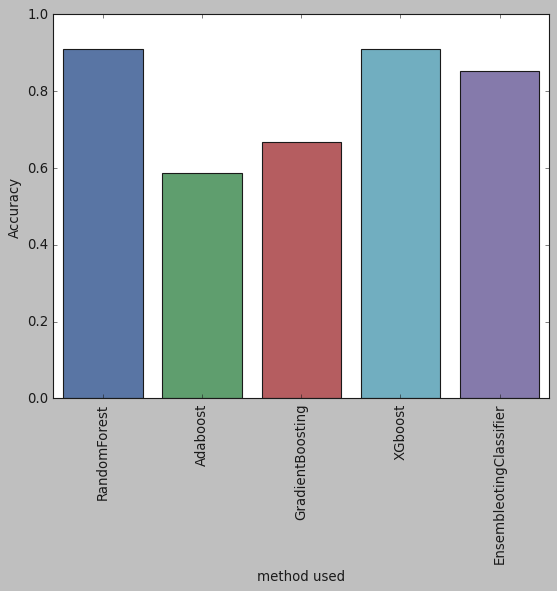

In [136]:
list1 = ["RandomForest","Adaboost","GradientBoosting","XGboost","EnsembleotingClassifier"]

list2 = [accuracy_rf,accuracy_ad_test,accuracy_gb,accuracy_xgb,accuracy_evc]

list3 = [rf,ad,gb,xgb,evc]

final = pd.DataFrame({"method used":list1,"Accuracy":list2})

print(final)

charts = sns.barplot(x="method used", y= "Accuracy", data= final)
charts.set_xticklabels(charts.get_xticklabels(),rotation =90)
print(charts)